### Feature Scaling

Feature scaling is a technique used to standardize the range of independent variables or features of data. In data processing, it is also known as **data normalization** and is crucial for machine learning algorithms that compute distances between data points, such as **k-nearest neighbors (KNN)** and **support vector machines (SVM)**.

There are several methods for feature scaling:

1. **Min-Max Scaling (Normalization)**:
    - Scales the data to a fixed range, usually 0 to 1.
    - Formula:  
      $$
      X' = \frac{X - X_{min}}{X_{max} - X_{min}}
      $$

2. **Standardization (Z-score Normalization)**:
    - Scales the data to have a mean of 0 and a standard deviation of 1.
    - Formula:  
      $$
      X' = \frac{X - \mu}{\sigma}
      $$
    - Where:
        - \( \mu \): the mean of the feature.  
        - \( \sigma \): the standard deviation of the feature.

3. **Robust Scaling**:
    - Uses the median and the interquartile range (IQR) for scaling.
    - Formula:  
      $$
      X' = \frac{X - \text{median}}{\text{IQR}}
      $$
    - Useful for data with outliers.

4. **MaxAbs Scaling**:
    - Scales each feature by its maximum absolute value.
    - Formula:  
      $$
      X' = \frac{X}{|X_{max}|}
      $$
    - Preserves the sparsity of the data.

Feature scaling ensures that each feature contributes equally to the result and improves the performance and training stability of machine learning models.


### Importance
`Feature Scaling` is a technique to standardize the independent features present in the data. It is performed during the data pre-processing ``to handle highly varying values``. If feature scaling is not done then ``machine learning algorithm tends to use greater values as higher and consider smaller values as lower regardless of the unit of the values``. For example it will take 10 m and 10 cm both as same regardless of their unit. In this article we will learn about different techniques which are used to perform feature scaling.

`After Perform feature scaling the nature of data remain same`
`Data Magnitude is reduced`

#### Types of feature scaling
- Standarization
- Normalization

#### Feature Scaling - `Standardization`
- It's s very effective technique which re-scales a feature values so that it has distribution with 0 mean value and varience equals to 1.

- Formula:  
      $$
      Xnew = \frac{Xi - Xmean}{\sigma}
      $$
    - Where:
        - **μ or Xmean (mu)**: the ``mean of the feature``.  
        - **σ (sigma)**: the ``standard deviation`` of the feature.

``Outlier not remove after scaling``

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
dataset = pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [133]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\shark\AppData\Local\Temp\ipykernel_8668\2264481338.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

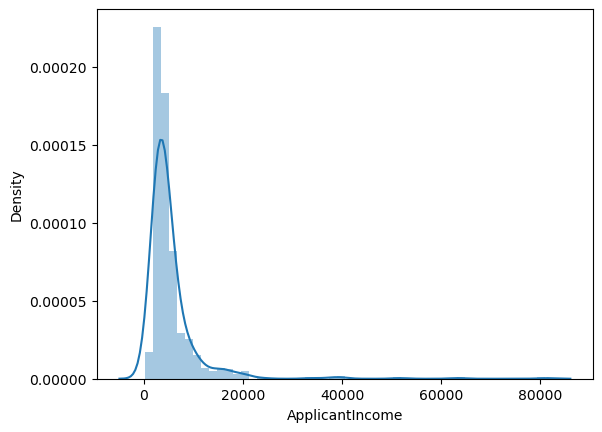

In [134]:
sns.distplot(dataset["ApplicantIncome"])

In [135]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [136]:
from sklearn.preprocessing import  StandardScaler
ss = StandardScaler()

In [137]:
ss.fit(dataset[["ApplicantIncome"]])
dataset["ApplicantIncome_ss"]= pd.DataFrame(ss.transform(dataset[["ApplicantIncome"]]),columns=["x"])

In [138]:
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.393747


In [139]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,564.000000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,0.000000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.238462e+01


C:\Users\shark\AppData\Local\Temp\ipykernel_8668\1709188074.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ApplicantIncome"], kde=True, bins=30, color="blue")
C:\Users\shark\AppData\Local\Temp\ipykernel_8668\1709188074.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["A

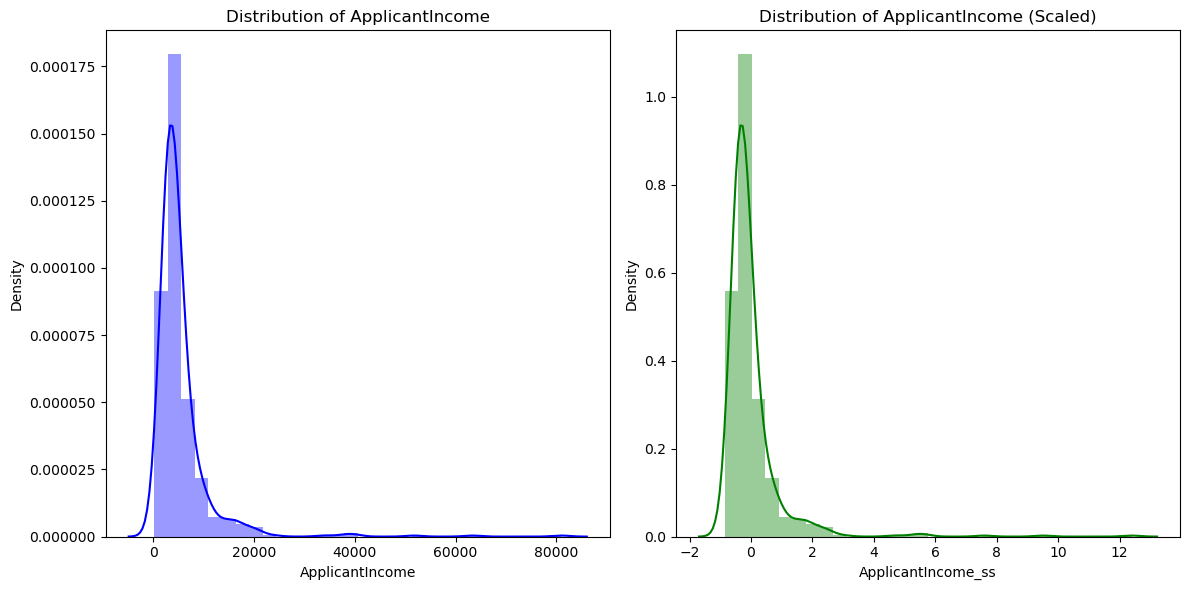

In [140]:
plt.figure(figsize=(12, 6))

# First subplot
plt.subplot(1, 2, 1)
sns.distplot(dataset["ApplicantIncome"], kde=True, bins=30, color="blue")
plt.title("Distribution of ApplicantIncome")

# Second subplot
plt.subplot(1, 2, 2)
sns.distplot(dataset["ApplicantIncome_ss"], kde=True, bins=30, color="green")
plt.title("Distribution of ApplicantIncome (Scaled)")

# Show the plot
plt.tight_layout()
plt.show()

1. **Min-Max Scaling (Normalization)**:
    - Scales the data to a fixed range, usually 0 to 1.
    - Formula:  
      $$
      X' = \frac{X - X_{min}}{X_{max} - X_{min}}
      $$

In [141]:
data = pd.read_csv("loan.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [142]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [144]:

data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


C:\Users\shark\AppData\Local\Temp\ipykernel_8668\2360673565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data["CoapplicantIncome"])


<Axes: ylabel='Density'>

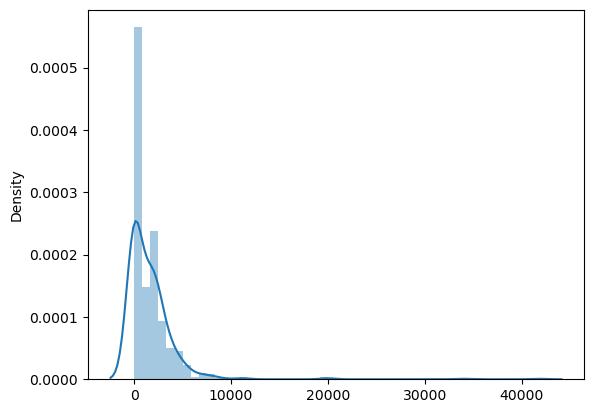

In [145]:
sns.distplot(x=data["CoapplicantIncome"])

In [146]:
from sklearn.preprocessing import MinMaxScaler

In [147]:
mms = MinMaxScaler()

mms_variable = mms.fit_transform(data[["CoapplicantIncome"]])

In [148]:
data["CoapplicantIncome_mms"] = pd.DataFrame(mms_variable,columns=["x"])

C:\Users\shark\AppData\Local\Temp\ipykernel_8668\1692431072.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["CoapplicantIncome"], kde=True, bins=30, color="blue")
C:\Users\shark\AppData\Local\Temp\ipykernel_8668\1692431072.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Coapp

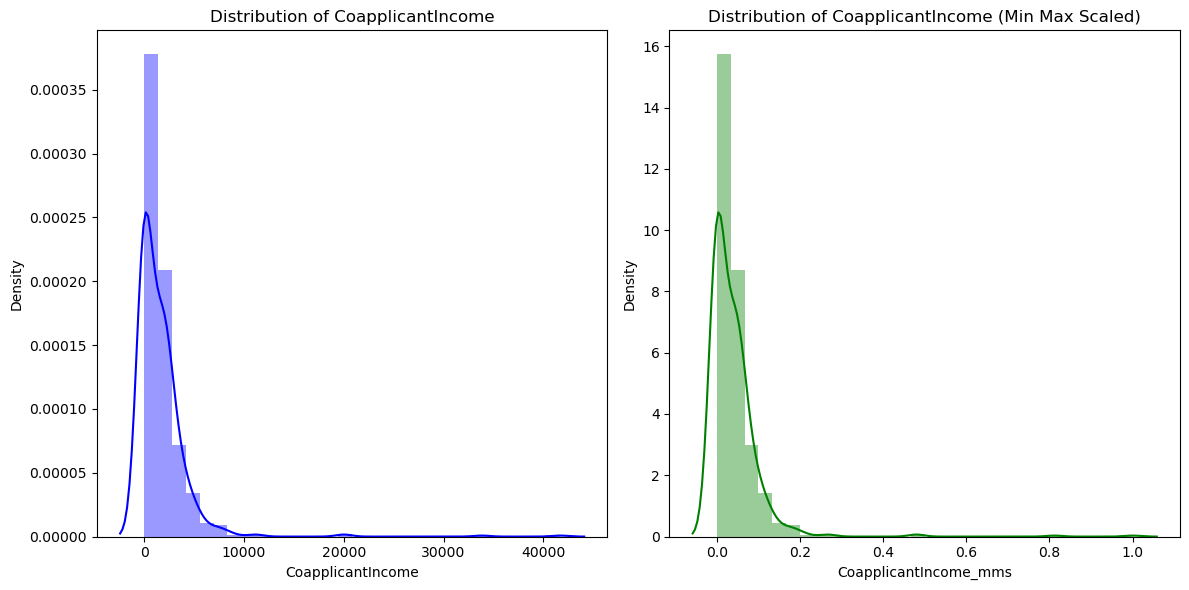

In [149]:
plt.figure(figsize=(12, 6))

# First subplot
plt.subplot(1, 2, 1)
sns.distplot(data["CoapplicantIncome"], kde=True, bins=30, color="blue")
plt.title("Distribution of CoapplicantIncome")

# Second subplot
plt.subplot(1, 2, 2)
sns.distplot(data["CoapplicantIncome_mms"], kde=True, bins=30, color="green")
plt.title("Distribution of CoapplicantIncome (Min Max Scaled)")

# Show the plot
plt.tight_layout()
plt.show()